Import public packages and functions

In [1]:
import os
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import json

In [2]:
def get_repo_path_in_notebook():
    """
    Finds path of repo from Notebook.
    Start running this once to correctly find
    other modules/functions
    """
    path = os.getcwd()
    repo_name = 'ultraleap_analysis'

    while path[-len(repo_name):] != 'ultraleap_analysis':

        path = os.path.dirname(path)

    return path

In [3]:
repo_path = get_repo_path_in_notebook()
code_path = os.path.join(repo_path, 'code')
os.chdir(code_path)

Import own functions

In [4]:
import import_data.import_and_convert_data as import_dat
import import_data.find_paths as find_paths
import movement_calc.helpfunctions as hp
import sig_processing.calc_features as feat_ext
import sig_processing.extract_features as extract_feat

### Feature Extraction

Load dist-time .csv files and calculate features

In [5]:
importlib.reload(hp)
importlib.reload(feat_ext)
importlib.reload(extract_feat)

<module 'sig_processing.extract_features' from 'c:\\Users\\madal\\Projects\\Thesis\\ultraleap_analysis\\code\\sig_processing\\extract_features.py'>

In [ ]:
folder = 'patientdata'
sub = 'ul001'
task = 'ps'
cond = 'm1'
cam = 'dt'
block = 'b1'
side = 'right'

In [44]:
dist = pd.read_csv(os.path.join(
    repo_path, 'data', folder, sub, task, cond, 'distances', 
    f'{block}_{sub}_{cond}_{cam}_{task}_{side}.csv'), 
    index_col=0
    )

In [146]:
from scipy.signal import savgol_filter, find_peaks

In [407]:
importlib.reload(hp)
# peaks=find_peaks(hp.moving_average_filter(dist['ang'], window_size=20))
peaks = find_peaks(savgol_filter(dist['ang'],window_length=15,polyorder=1))
# filtered_signal = hp.moving_average_filter(dist['ang'], window_size=20)
filtered_signal = savgol_filter(dist['ang'],window_length=15,polyorder=1)

In [368]:
from scipy.ndimage import uniform_filter1d
from scipy.ndimage import filters 
from scipy import interpolate
from scipy.signal import medfilt

In [409]:
dist_sig = -dist['ang']
filtered_signal = medfilt(dist['ang'], kernel_size=15)
peaks = find_peaks(-filtered_signal)
peaks

(array([ 65, 104, 136, 183, 229, 272, 308, 353, 387, 428, 464, 499, 535,
        583, 617, 653, 687, 727, 758, 797, 830], dtype=int64),
 {})

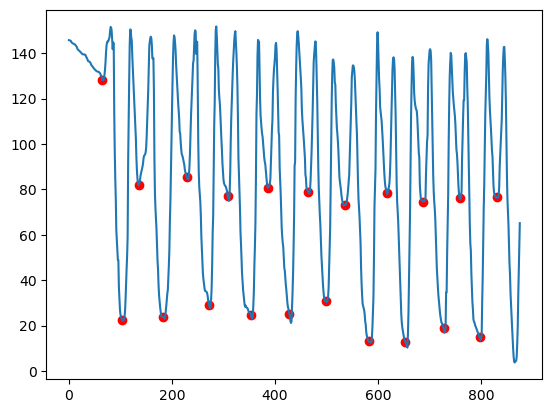

In [410]:
# plt.scatter(peaks[0],filtered_signal[peaks[0]])
# plt.plot(filtered_signal)
plt.plot(dist['ang'])
plt.scatter(peaks[0],dist['ang'][peaks[0]], color='red')

In [329]:
def pick_peaks(nc, L=20):
    """Obtain peaks from a novelty curve using an adaptive threshold."""
   
    offset = nc.mean() / 20.
    copy_data = nc
    nc = filters.gaussian_filter1d(nc, sigma=4)  # Smooth out nc

    # th = filters.median_filter(nc, size=L) + offset
    th = filters.gaussian_filter(nc, sigma=L/2., mode="nearest") + offset

    peaks = []
    for i in range(1, nc.shape[0] - 1):
        # is it a peak?
        if nc[i - 1] < nc[i] and nc[i] > nc[i + 1]:
            # is it above the threshold?
            if nc[i] > th[i]:
                peaks.append(i)
    plt.plot(nc,color = 'orange', alpha=0.5)
    plt.plot(th)
    plt.plot(copy_data, color='black', alpha=0.7)
    # for peak in peaks:
    #     # plt.axvline(peak)
    #     plt.plot(peak)
    plt.scatter(peaks,copy_data[peaks], color='black', marker='^')
    plt.show()

    return peaks

C:\Users\madal\AppData\Local\Temp\ipykernel_12304\4248631453.py:6: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  nc = filters.gaussian_filter1d(nc, sigma=4)  # Smooth out nc
C:\Users\madal\AppData\Local\Temp\ipykernel_12304\4248631453.py:9: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  th = filters.gaussian_filter(nc, sigma=L/2., mode="nearest") + offset


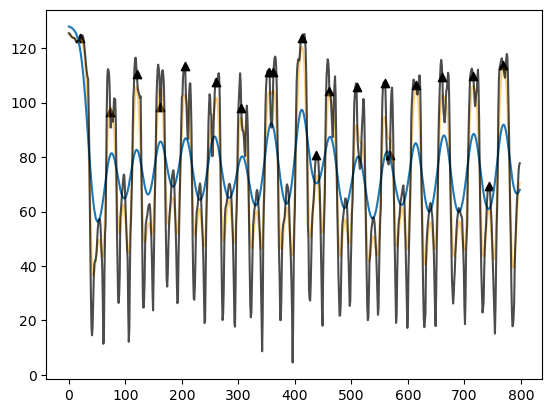

[20,
 73,
 120,
 162,
 205,
 261,
 305,
 355,
 362,
 413,
 438,
 461,
 509,
 559,
 568,
 614,
 661,
 715,
 743,
 769]

In [330]:
pick_peaks(dist_sig)

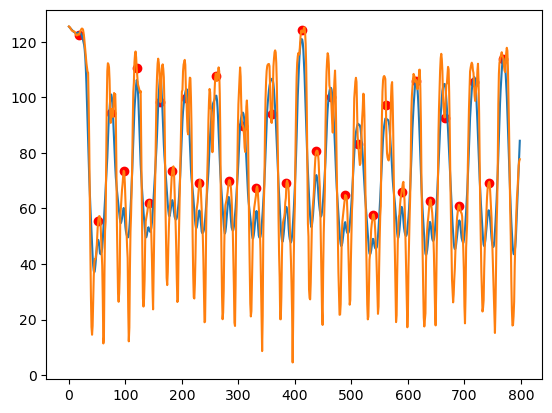

In [205]:
# plt.scatter(peaks[0],filtered_signal[peaks[0]])
plt.plot(filtered_signal)
plt.plot(dist['ang'])
plt.scatter(peaks[0],dist['ang'][peaks[0]], color='red')

In [6]:
folder = 'patientdata'
subs = find_paths.find_available_subs(folder)
ls_task = ['ft', 'oc', 'ps']
# task = 'ps'
ls_cond = ['m0s0', 'm1s0', 'm1s1', 'm0s1', 'm1', 'm0']
# cond = 'm0'
ls_cam = ['vr', 'dt', 'st']
ls_block = ['b1', 'b2', 'b3']
ls_side = ['right', 'left']

In [16]:
folder = 'patientdata'
subs = find_paths.find_available_subs(folder)
ls_task = ['ft', 'oc', 'ps']
ls_cond = ['m0s0', 'm1s0', 'm1s1', 'm0s1', 'm1', 'm0']
# cond = 'm0'
ls_cam = ['vr', 'dt', 'st']
ls_block = ['b1', 'b2', 'b3']
ls_side = ['right', 'left']

Import features without opening and closing speed

In [7]:
importlib.reload(import_dat)
importlib.reload(find_paths)
importlib.reload(feat_ext)
importlib.reload(hp)

for sub in subs:
    for task in ls_task:
        for side in ls_side:
            for cond in ls_cond:
                for cam in ls_cam:
                    for block in ls_block:
                        try:                                           
                            # Load blocks from patients' blocks dir
                            dist = pd.read_csv(
                                os.path.join(
                                repo_path, 'data', folder, sub, task, cond, 'distances', 
                                f'{block}_{sub}_{cond}_{cam}_{task}_{side}.csv'), 
                                index_col=0
                                )
                            print(f'before feat extraction {sub,task,side,cond,cam,block}') 
                            get_feat = feat_ext.calculate_feat(folder, dist, block, sub, cond, cam, task, side, 
                                                                to_plot = True, to_save_plot = True, to_save = True)

                        except FileNotFoundError:
                            print('No files available for combination: '
                                f'{block, sub, cond, cam, task, side}')

No files available for combination: ('b1', 'ul001', 'm0s0', 'vr', 'ft', 'right')
No files available for combination: ('b2', 'ul001', 'm0s0', 'vr', 'ft', 'right')
No files available for combination: ('b3', 'ul001', 'm0s0', 'vr', 'ft', 'right')
No files available for combination: ('b1', 'ul001', 'm0s0', 'dt', 'ft', 'right')
No files available for combination: ('b2', 'ul001', 'm0s0', 'dt', 'ft', 'right')
No files available for combination: ('b3', 'ul001', 'm0s0', 'dt', 'ft', 'right')
No files available for combination: ('b1', 'ul001', 'm0s0', 'st', 'ft', 'right')
No files available for combination: ('b2', 'ul001', 'm0s0', 'st', 'ft', 'right')
No files available for combination: ('b3', 'ul001', 'm0s0', 'st', 'ft', 'right')
No files available for combination: ('b1', 'ul001', 'm1s0', 'vr', 'ft', 'right')
No files available for combination: ('b2', 'ul001', 'm1s0', 'vr', 'ft', 'right')
No files available for combination: ('b3', 'ul001', 'm1s0', 'vr', 'ft', 'right')
No files available for combi

Import features with opening and closing speed

In [19]:
importlib.reload(import_dat)
importlib.reload(find_paths)
importlib.reload(feat_ext)
importlib.reload(hp)
importlib.reload(extract_feat)

for sub in subs:
    for task in ls_task:
        for side in ls_side:
            for cond in ls_cond:
                for cam in ls_cam:
                    for block in ls_block:
                        try:                                           
                            # Load blocks from patients' blocks dir
                            dist = pd.read_csv(
                                os.path.join(
                                repo_path, 'data', folder, sub, task, cond, 'distances', 
                                f'{block}_{sub}_{cond}_{cam}_{task}_{side}.csv'), 
                                index_col=0
                                )
                            print(f'before feat extraction {sub,task,side,cond,cam,block}') 
                            get_feat = extract_feat.calculate_feat(folder, dist, block, sub, cond, cam, task, side, 
                                                                to_plot = True, to_save_plot = True, to_save = True)

                        except FileNotFoundError:
                            print('No files available for combination: '
                                f'{block, sub, cond, cam, task, side}')

No files available for combination: ('b1', 'ul001', 'm0s0', 'vr', 'ft', 'right')
No files available for combination: ('b2', 'ul001', 'm0s0', 'vr', 'ft', 'right')
No files available for combination: ('b3', 'ul001', 'm0s0', 'vr', 'ft', 'right')
No files available for combination: ('b1', 'ul001', 'm0s0', 'dt', 'ft', 'right')
No files available for combination: ('b2', 'ul001', 'm0s0', 'dt', 'ft', 'right')
No files available for combination: ('b3', 'ul001', 'm0s0', 'dt', 'ft', 'right')
No files available for combination: ('b1', 'ul001', 'm0s0', 'st', 'ft', 'right')
No files available for combination: ('b2', 'ul001', 'm0s0', 'st', 'ft', 'right')
No files available for combination: ('b3', 'ul001', 'm0s0', 'st', 'ft', 'right')
No files available for combination: ('b1', 'ul001', 'm1s0', 'vr', 'ft', 'right')
No files available for combination: ('b2', 'ul001', 'm1s0', 'vr', 'ft', 'right')
No files available for combination: ('b3', 'ul001', 'm1s0', 'vr', 'ft', 'right')
No files available for combi

Create features dataframe 

In [14]:
# Define task
task = 'ps'

In [15]:
subs = find_paths.find_available_subs(folder)
list_of_feats = []
files = []
feat_folder = 'new_features'

for sub in subs:
    for side in ls_side:
        for cond in ls_cond:
            for cam in ls_cam:
                for block in ls_block:

                    file = os.path.join(repo_path, feat_folder, folder, sub, task, cond, 'features_block',f'{block}_{sub}_{cond}_{cam}_{task}_{side}.json')
                    if not os.path.exists(file):
                        print('No files available for combination: '
                            f'{block, sub, cond, cam, task, side}')
                        continue  # skips non-existing files
                    with open(file) as f:
                        load_json = json.load(f)
                        feat_names = list(load_json.keys())
                        if not any(load_json.values()):
                            continue  # skips empty files
                        fts = np.array(list(load_json.values())).ravel()
                        list_of_feats.append(fts)
                        files.append(f'{block}_{sub}_{cond}_{cam}_{task}_{side}.json')

all_feats = np.array(list_of_feats)
df_fts = pd.DataFrame(data=all_feats, columns=feat_names)
df_fts.insert(loc=0, column='file', value=files)

No files available for combination: ('b1', 'ul001', 'm0s0', 'vr', 'ps', 'right')
No files available for combination: ('b2', 'ul001', 'm0s0', 'vr', 'ps', 'right')
No files available for combination: ('b3', 'ul001', 'm0s0', 'vr', 'ps', 'right')
No files available for combination: ('b1', 'ul001', 'm0s0', 'dt', 'ps', 'right')
No files available for combination: ('b2', 'ul001', 'm0s0', 'dt', 'ps', 'right')
No files available for combination: ('b3', 'ul001', 'm0s0', 'dt', 'ps', 'right')
No files available for combination: ('b1', 'ul001', 'm0s0', 'st', 'ps', 'right')
No files available for combination: ('b2', 'ul001', 'm0s0', 'st', 'ps', 'right')
No files available for combination: ('b3', 'ul001', 'm0s0', 'st', 'ps', 'right')
No files available for combination: ('b1', 'ul001', 'm1s0', 'vr', 'ps', 'right')
No files available for combination: ('b2', 'ul001', 'm1s0', 'vr', 'ps', 'right')
No files available for combination: ('b3', 'ul001', 'm1s0', 'vr', 'ps', 'right')
No files available for combi

Save features dataframe in csv file

In [16]:
df_fts_path = os.path.join(repo_path,
                           'EDA',
                           folder,
                           task
                           ) 
if not os.path.exists(df_fts_path):
    os.makedirs(df_fts_path)
df_fts.to_csv(os.path.join(df_fts_path, f'{feat_folder}.csv'))